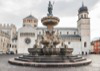

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import cmath as math

x = Image.open("./TrentoDuomo.jpg").convert('RGB')

x

In [2]:
width = x.size[0]
height = x.size[1]
n = width*height
n

7100

In [3]:
xarr = np.array(x)
red = xarr[:,:,0].flatten(order='C')
green = xarr[:,:,1].flatten(order='C')
blue = xarr[:,:,2].flatten(order='C')
print(red.shape)

(7100,)


35


/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


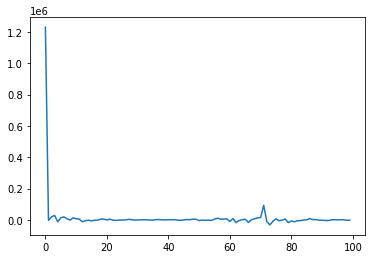

In [4]:
from scipy.fft import fft, ifft
lamdared=0
yred = fft(red)
plt.plot(yred[0:100])
lamdared =(yred > 10000).sum()
print(lamdared)

41


/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


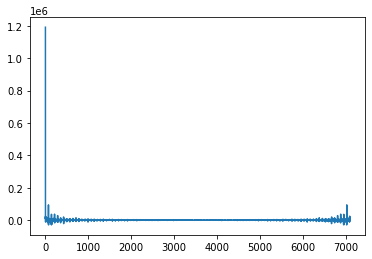

In [5]:
lamdagreen=0
ygreen = fft(green)
plt.plot(ygreen)
lamdagreen =(ygreen > 10000).sum()
print(lamdagreen)

41


/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


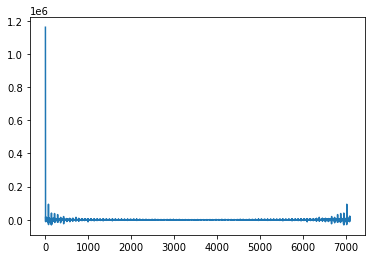

In [6]:
lamdablue=0
yblue = fft(blue)
plt.plot(yblue)
lamdablue =(yblue > 10000).sum()
print(lamdablue)

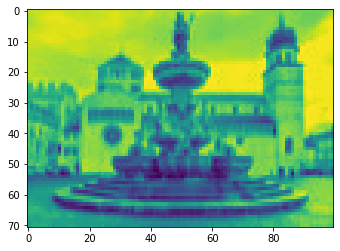

In [7]:
redrec = ifft(yred).real
plt.imshow(np.reshape(redrec, (71,100)))

In [8]:
def DFT_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * math.pi * 1J / N )
    W = np.power( omega, i * j ) / math.sqrt(N)
    return W

In [9]:
FourierMat = DFT_matrix(n)

In [10]:
def create_measurements(F, lamda, m, n): 
    Omega = np.arange(n)
    indexes = np.random.binomial(1, m/n, n)
    indexes = np.multiply(Omega, indexes)
    indexes = [i for i in indexes if i != 0]
    A = F[indexes,:]
    print(A.shape)
    A = np.array(A)
    return (1/math.sqrt(m))*A

In [11]:
mred = int(2*lamdared*math.log(n)*math.log(1/0.01))
print(mred)
mgreen = int(2*lamdagreen*math.log(n)*math.log(1/0.01))
print(mgreen)
mblue = int(2*lamdablue*math.log(n)*math.log(1/0.01))
print(mblue)

2858
3348
3348


/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


In [12]:
FourRed = create_measurements(FourierMat, lamdared, mred, n)
FourGreen = create_measurements(FourierMat, lamdagreen, mgreen, n)
FourBlue = create_measurements(FourierMat, lamdablue, mblue, n)

(2843, 7100)
(3437, 7100)
(3342, 7100)


In [13]:
bred = FourRed.dot(yred)
bgreen = FourGreen.dot(ygreen)
bblue = FourBlue.dot(yblue)

In [ ]:
import cvxpy as cvx
signalBlue = cvx.Variable(n, complex=True)
objective = cvx.Minimize(cvx.norm(signalBlue, 1))
constraints = [FourBlue*signalBlue == bblue]
prob = cvx.Problem(objective, constraints)
resultBlue = prob.solve(verbose=True)
singalBlue = signalBlue.value

signalRed = cvx.Variable(n, complex=True)
objective = cvx.Minimize(cvx.norm(signalRed, 1))
constraints = [FourRed*signalRed == bred]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)
singalRed = signalRed.value

signalGreen = cvx.Variable(n, complex=True)
objective = cvx.Minimize(cvx.norm(signalGreen, 1))
constraints = [FourGreen*signalGreen == bgreen]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)
singalGreen = signalGreen.value

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 04 05:34:59 PM: Your problem has 7100 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 04 05:34:59 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 04 05:34:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 04 05:34:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 04 05:34:59 PM: Compiling problem (target solver=ECOS).
(CVXPY) Oct 04 05:34:59 PM: Reduction chain: Complex2Real -> Dcp2Cone -> CvxAttr2Constr -> Con

/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Oct 04 05:34:59 PM: Applying reduction Dcp2Cone
(CVXPY) Oct 04 05:34:59 PM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 04 05:34:59 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 04 05:36:16 PM: Applying reduction ECOS
(CVXPY) Oct 04 05:37:39 PM: Finished problem compilation (took 1.604e+02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 04 05:37:40 PM: Invoking solver ECOS  to obtain a solution.


In [20]:
import csv

def save_rec_as_txt(name, signal):
    with open(name, 'w') as f:
        # create the csv writer
        np.savetxt(name,signal,delimiter=',')

In [27]:
save_rec_as_txt('ImmFouRed.txt', singalRed)
save_rec_as_txt('ImmFouGreen.txt', singalGreen)
save_rec_as_txt('ImmFouBlue.txt', singalBlue)

/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


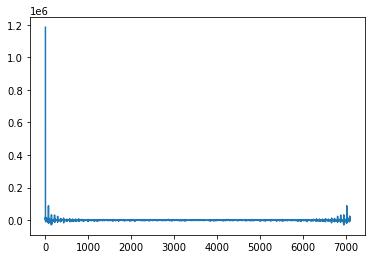

In [22]:
plt.plot(singalGreen)

/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


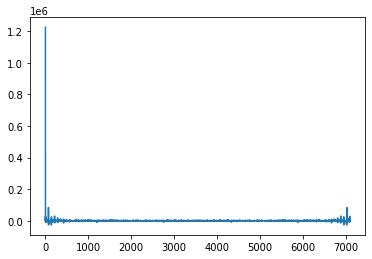

In [23]:
plt.plot(singalRed)

/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


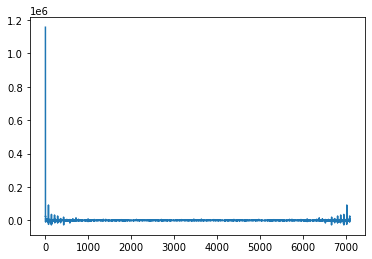

In [24]:
plt.plot(singalBlue)

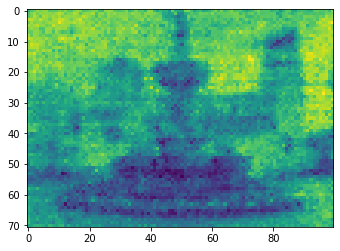

In [29]:
imageGreen = ifft(singalGreen).real
imageGreen = np.reshape(imageGreen, (71,100))
plt.imshow(imageGreen)
imageRed = ifft(singalRed).real
imageRed = np.reshape(imageRed, (71,100))

imageBlue = ifft(singalBlue).real
imageBlue = np.reshape(imageBlue, (71,100))

[[[219 191 201]
  [192 212 204]
  [210 220 235]
  ...
  [223 217 202]
  [216 200 216]
  [199 234 203]]

 [[214 209 227]
  [230 230 204]
  [234 245 210]
  ...
  [219 224 251]
  [231 223 225]
  [229 229 248]]

 [[235 216 224]
  [235 228 228]
  [235 250 219]
  ...
  [223 248 254]
  [223 232 242]
  [228 238 240]]

 ...

 [[208 196 147]
  [184 173 161]
  [179 168 167]
  ...
  [208 203 196]
  [207 195 167]
  [189 162 188]]

 [[200 204 183]
  [190 170 151]
  [170 161 162]
  ...
  [216 189 178]
  [221 201 167]
  [186 189 205]]

 [[196 178 191]
  [227 174 186]
  [226 191 184]
  ...
  [206 207 199]
  [205 189 202]
  [199 178 172]]]


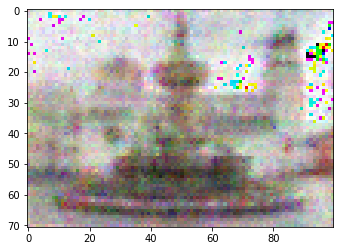

In [38]:
recImage = np.stack((imageRed.astype('uint8'), imageGreen.astype('uint8'), imageBlue.astype('uint8')), axis=2)
print(recImage)
plt.imshow(recImage)

In [39]:
plt.imsave('RecDuomo.jpg', recImage)